# 입문자를 위한, 파이썬/R 데이터 분석  

]

## Today's mission

- 추천 알고리즘 소개
- 예제: 협업 필터링 (Collaborative Filtering) 구현하기

]

## 추천 알고리즘 소개

참고 : [추천 시스템, 추천 알고리즘 종류](https://velog.io/@jochedda/%EC%B6%94%EC%B2%9C-%EC%8B%9C%EC%8A%A4%ED%85%9C-%EC%B6%94%EC%B2%9C-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-%EC%A2%85%EB%A5%98)

## Collaborative Filtering (협업필터링)

>  - 다른 상품(item; I)이나, 사용자(user; U) 정보를 이용하여 평점(rating; r) 을 데이터화로 분석하는 방법
>  - 사용자가 선호하는 다른 상품을 추천하는 방법 : item-based 기법  ( 현실적으로 많이 사용 )
>  - 다른 사용자가 선호하는 상품을 추천하는 방법 : user-based 기법
>  - 유사도를 계산 (예: cosine similarity) : 1 에 가까울수록 유사, -1 이면 유사하지 않음
>  - Pearson 상관계수, Cosine 유사도 모두 사용하고 나은 것을 선택, 활용이 일반적임; 유클리디안 유사도는 사용 안함

### Package Import

In [1]:
import numpy as np
import pandas as pd

### Load Dataset

In [2]:
file = "data/ratings.csv"
data = pd.read_csv(file)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사람      23 non-null     object 
 1   책       23 non-null     object 
 2   평점      23 non-null     float64
dtypes: float64(1), object(2)
memory usage: 680.0+ bytes


In [5]:
data.head()#.info()

,사람,책,평점
0,민지,백설공주,5.0
1,민지,신데렐라,4.0
2,민지,어린왕자,1.0
3,민지,흥부전,3.0
4,현우,노인과바다,3.0


In [7]:
set(data['사람'].to_list())

{'민수', '민지', '지민', '지연', '현우'}

In [8]:
set(data['책'].to_list())

{'노인과바다', '백설공주', '신데렐라', '어린왕자', '콩쥐팥쥐', '흥부전'}

In [9]:
ratings = pd.pivot_table(data, index="사람", columns="책", values="평점").sort_values(by='노인과바다', ascending=True)
ratings

책,노인과바다,백설공주,신데렐라,어린왕자,콩쥐팥쥐,흥부전
사람,,,,,,
민수,3.0,4.0,4.0,3.0,4.0,NaN
현우,3.0,NaN,2.0,NaN,1.0,2.0
지민,4.0,1.0,NaN,5.0,2.0,3.0
지연,5.0,NaN,3.0,4.0,3.0,3.0
민지,NaN,5.0,4.0,1.0,NaN,3.0


### [Cosine similarity](https://ko.wikipedia.org/wiki/%EC%BD%94%EC%82%AC%EC%9D%B8_%EC%9C%A0%EC%82%AC%EB%8F%84)

#### Test: Numpy remind

In [58]:
np.array([1,np.nan,3]+[4,5,6])

array([ 1., nan,  3.,  4.,  5.,  6.])

In [59]:
u = np.array([1,np.nan,3])
v = np.array([4,5,6])

In [60]:
print( u, v )

[ 1. nan  3.] [4 5 6]


In [61]:
print( u, v )
print(u + v)

[ 1. nan  3.] [4 5 6]
[ 5. nan  9.]


In [62]:
print( u, v )
print( u - v )

[ 1. nan  3.] [4 5 6]
[-3. nan -3.]


In [63]:
print( u, v )
print( u * v )

[ 1. nan  3.] [4 5 6]
[ 4. nan 18.]


In [64]:
print( u,)
print( u ** 2 )

[ 1. nan  3.]
[ 1. nan  9.]


In [65]:
print(u)
print( (u ** 2).sum() )

[ 1. nan  3.]
nan


In [66]:
print( u )
print(np.isnan(u))

[ 1. nan  3.]
[False  True False]


In [67]:
print( u )
print(np.isfinite(u))                       # not NaN(Not a Number) 찾기 -> 숫자만 골라내기

[ 1. nan  3.]
[ True False  True]


In [68]:
print( v )
print(np.isfinite(v))

[4 5 6]
[ True  True  True]


In [69]:
print( u, v )
print(np.isfinite(u) & np.isfinite(v))      # Boolean(T/F) 값을 찾기

[ 1. nan  3.] [4 5 6]
[ True False  True]


In [70]:
print( u, v )
print(v[np.isfinite(u) & np.isfinite(v)])   # T/F 기준으로 데이터value 구하기

[ 1. nan  3.] [4 5 6]
[4 6]


#### 적용

In [99]:
def get_cosine_similarity(u, v):
    mask = np.isfinite(u) & np.isfinite(v)
    
    # print("NaN 걸러내기 이전 : ", u, v )   # NaN 걸러내기 이전
    
    u = u[mask]
    v = v[mask]
    
    # print("NaN 걸러낸 이후 : ", u, v )   # NaN 걸러낸 이후
    
    uvdot = (u * v).sum()
    # print("uvdot : ", uvdot)
    
    norm1 = (u ** 2).sum()
    norm2 = (v ** 2).sum()
    # print("norm1 : ", norm1)
    # print("norm2 : ", norm2)
    
    score = uvdot / np.sqrt(norm1 * norm2)

    # plot_vectors(u, v, 'test')
    
    return score

In [93]:
def get_cosine_similarity_v2(u, v):
    mask = np.isfinite(u) & np.isfinite(v)
    
    u = u[mask]
    v = v[mask]
    
    uvdot = (u * v).sum()

    
    norm1 = (u ** 2).sum()
    norm2 = (v ** 2).sum()
    
    score = uvdot / np.sqrt(norm1 * norm2)

    plot_vectors(u, v, 'test')
    
    return score

In [49]:
np.sqrt(25 * 20)

22.360679774997898

In [50]:
25 * 20

500

In [52]:
20 / np.sqrt(500)

0.8944271909999159

In [72]:
u = np.array([np.nan, 4, 3])
v = np.array([3, 2, 4])

In [73]:
print(u, v)

[nan  4.  3.] [3 2 4]


NaN 걸러내기 이전 :  [nan  4.  3.] [3 2 4]
NaN 걸러낸 이후 :  [4. 3.] [2 4]
uvdot :  20.0
norm1 :  25.0
norm2 :  20


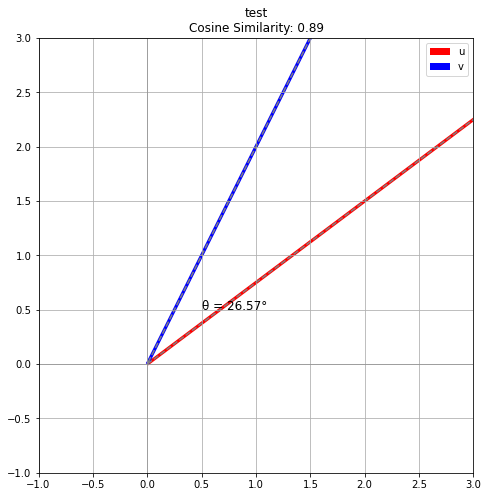

0.8944271909999159

In [76]:
get_cosine_similarity(u, v)

In [77]:
ratings

책,노인과바다,백설공주,신데렐라,어린왕자,콩쥐팥쥐,흥부전
사람,,,,,,
민수,3.0,4.0,4.0,3.0,4.0,NaN
현우,3.0,NaN,2.0,NaN,1.0,2.0
지민,4.0,1.0,NaN,5.0,2.0,3.0
지연,5.0,NaN,3.0,4.0,3.0,3.0
민지,NaN,5.0,4.0,1.0,NaN,3.0


In [78]:
u = ratings.loc["민수"]
v = ratings.loc["민지"]
u, v

(책
 노인과바다    3.0
 백설공주     4.0
 신데렐라     4.0
 어린왕자     3.0
 콩쥐팥쥐     4.0
 흥부전      NaN
 Name: 민수, dtype: float64,
 책
 노인과바다    NaN
 백설공주     5.0
 신데렐라     4.0
 어린왕자     1.0
 콩쥐팥쥐     NaN
 흥부전      3.0
 Name: 민지, dtype: float64)

NaN 걸러내기 이전 :  책
노인과바다    3.0
백설공주     4.0
신데렐라     4.0
어린왕자     3.0
콩쥐팥쥐     4.0
흥부전      NaN
Name: 민수, dtype: float64 책
노인과바다    NaN
백설공주     5.0
신데렐라     4.0
어린왕자     1.0
콩쥐팥쥐     NaN
흥부전      3.0
Name: 민지, dtype: float64
NaN 걸러낸 이후 :  책
백설공주    4.0
신데렐라    4.0
어린왕자    3.0
Name: 민수, dtype: float64 책
백설공주    5.0
신데렐라    4.0
어린왕자    1.0
Name: 민지, dtype: float64
uvdot :  39.0
norm1 :  41.0
norm2 :  42.0


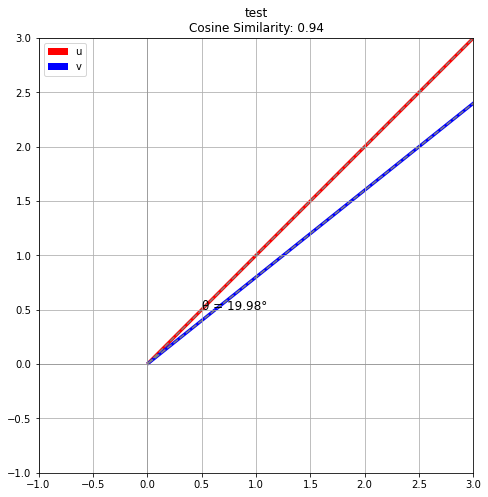

0.9398272507881658

In [79]:
get_cosine_similarity(u, v)

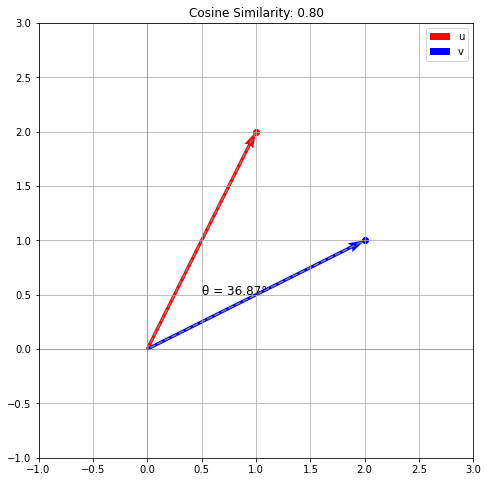

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# 두 벡터 정의
u = np.array([1, 2])
v = np.array([2, 1])

# 두 벡터의 내적과 크기 계산
uvdot = np.dot(u, v)
norm_u = np.linalg.norm(u)
norm_v = np.linalg.norm(v)

# 코사인 유사도 계산
cosine_similarity = uvdot / (norm_u * norm_v)

# 두 벡터 사이의 각도 계산 (라디안)
angle = np.arccos(cosine_similarity)

# 그래프 그리기
plt.figure(figsize=(8, 8))
plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='r', label='u')
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', label='v')

# 벡터의 끝점을 원으로 표시
plt.scatter(u[0], u[1], color='r')
plt.scatter(v[0], v[1], color='b')

# 벡터의 끝점을 이어주는 선을 그리기
plt.plot([u[0], 0, v[0]], [u[1], 0, v[1]], linestyle='--', color='gray')

# 각도 표시
plt.text(0.5, 0.5, f"θ = {np.degrees(angle):.2f}°", fontsize=12, color='k')

# 축 설정
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.grid()
plt.legend()
plt.title(f'Cosine Similarity: {cosine_similarity:.2f}')
plt.gca().set_aspect('equal', adjustable='box')

# 그래프 표시
plt.show()

/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) mis

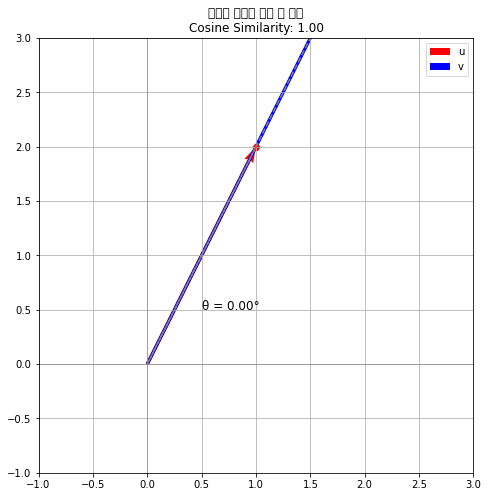

/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50506 (\N{HANGUL SYLLABLE ANH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


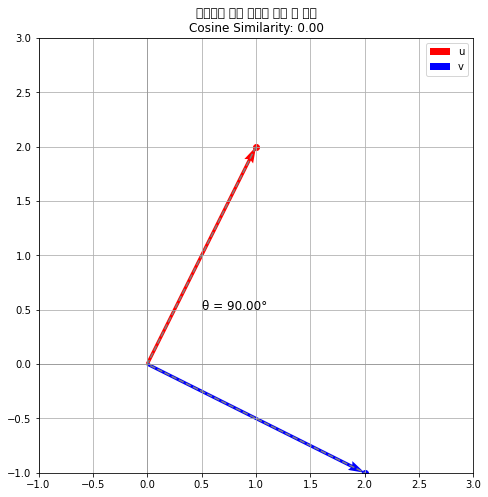

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vectors(u, v, title):
    # 두 벡터의 내적과 크기 계산
    uvdot = np.dot(u, v)
    norm_u = np.linalg.norm(u)
    norm_v = np.linalg.norm(v)

    # 코사인 유사도 계산
    cosine_similarity = uvdot / (norm_u * norm_v)

    # 두 벡터 사이의 각도 계산 (라디안)
    angle = np.arccos(cosine_similarity)

    # 그래프 그리기
    plt.figure(figsize=(8, 8))
    plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='r', label='u')
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', label='v')

    # 벡터의 끝점을 원으로 표시
    plt.scatter(u[0], u[1], color='r')
    plt.scatter(v[0], v[1], color='b')

    # 벡터의 끝점을 이어주는 선을 그리기
    plt.plot([u[0], 0, v[0]], [u[1], 0, v[1]], linestyle='--', color='gray')

    # 각도 표시
    plt.text(0.5, 0.5, f"θ = {np.degrees(angle):.2f}°", fontsize=12, color='k')

    # 축 설정
    plt.xlim(-1, 3)
    plt.ylim(-1, 3)
    plt.axhline(0, color='gray', lw=0.5)
    plt.axvline(0, color='gray', lw=0.5)
    plt.grid()
    plt.legend()
    plt.title(f'{title}\nCosine Similarity: {cosine_similarity:.2f}')
    plt.gca().set_aspect('equal', adjustable='box')

    # 그래프 표시
    plt.show()

# 유사한 방향을 가진 두 벡터
u_similar = np.array([1, 2])
v_similar = np.array([2, 4])
plot_vectors(u_similar, v_similar, '유사한 방향을 가진 두 벡터')

# 유사하지 않은 방향을 가진 두 벡터
u_different = np.array([1, 2])
v_different = np.array([2, -1])
plot_vectors(u_different, v_different, '유사하지 않은 방향을 가진 두 벡터')

### 전체 사용자 코사인 유사도 구하기 

참고 : [Python 순열, 조합, product - itertools](https://velog.io/@davkim1030/Python-%EC%88%9C%EC%97%B4-%EC%A1%B0%ED%95%A9-product-itertools)

In [81]:
from itertools import product

In [87]:
list(product(ratings.index, repeat=2))

[('민수', '민수'),
 ('민수', '현우'),
 ('민수', '지민'),
 ('민수', '지연'),
 ('민수', '민지'),
 ('현우', '민수'),
 ('현우', '현우'),
 ('현우', '지민'),
 ('현우', '지연'),
 ('현우', '민지'),
 ('지민', '민수'),
 ('지민', '현우'),
 ('지민', '지민'),
 ('지민', '지연'),
 ('지민', '민지'),
 ('지연', '민수'),
 ('지연', '현우'),
 ('지연', '지민'),
 ('지연', '지연'),
 ('지연', '민지'),
 ('민지', '민수'),
 ('민지', '현우'),
 ('민지', '지민'),
 ('민지', '지연'),
 ('민지', '민지')]

In [83]:
print(len(list(product(ratings.index, repeat=2))))

25


In [84]:
list(product(ratings.index, repeat=2))

[('민수', '민수'),
 ('민수', '현우'),
 ('민수', '지민'),
 ('민수', '지연'),
 ('민수', '민지'),
 ('현우', '민수'),
 ('현우', '현우'),
 ('현우', '지민'),
 ('현우', '지연'),
 ('현우', '민지'),
 ('지민', '민수'),
 ('지민', '현우'),
 ('지민', '지민'),
 ('지민', '지연'),
 ('지민', '민지'),
 ('지연', '민수'),
 ('지연', '현우'),
 ('지연', '지민'),
 ('지연', '지연'),
 ('지연', '민지'),
 ('민지', '민수'),
 ('민지', '현우'),
 ('민지', '지민'),
 ('민지', '지연'),
 ('민지', '민지')]

In [89]:
ratings.index
list(product(ratings.index, repeat=2))

[('민수', '민수'),
 ('민수', '현우'),
 ('민수', '지민'),
 ('민수', '지연'),
 ('민수', '민지'),
 ('현우', '민수'),
 ('현우', '현우'),
 ('현우', '지민'),
 ('현우', '지연'),
 ('현우', '민지'),
 ('지민', '민수'),
 ('지민', '현우'),
 ('지민', '지민'),
 ('지민', '지연'),
 ('지민', '민지'),
 ('지연', '민수'),
 ('지연', '현우'),
 ('지연', '지민'),
 ('지연', '지연'),
 ('지연', '민지'),
 ('민지', '민수'),
 ('민지', '현우'),
 ('민지', '지민'),
 ('민지', '지연'),
 ('민지', '민지')]

In [90]:
ratings

책,노인과바다,백설공주,신데렐라,어린왕자,콩쥐팥쥐,흥부전
사람,,,,,,
민수,3.0,4.0,4.0,3.0,4.0,NaN
현우,3.0,NaN,2.0,NaN,1.0,2.0
지민,4.0,1.0,NaN,5.0,2.0,3.0
지연,5.0,NaN,3.0,4.0,3.0,3.0
민지,NaN,5.0,4.0,1.0,NaN,3.0


In [117]:
from itertools import product

def get_cosine_similarity_table(ratings):
    index_combinations = list(product(ratings.index, repeat=2))
    
    similarity_list = []
    
    for uname, vname in index_combinations:
        u = ratings.loc[uname]
        v = ratings.loc[vname]
        
        score = get_cosine_similarity(u, v)
        
        similarity = {
            'u': uname,
            'v': vname,
            'score': score
        }
        
        similarity_list.append(similarity)
        
    similarity_list = pd.DataFrame(similarity_list)
    
    similarity_table = pd.pivot_table(similarity_list, index='u', columns='v', values='score')
    
    return similarity_table

In [118]:
similarity_table = get_cosine_similarity_table(ratings)

In [120]:
similarity_table

v,민수,민지,지민,지연,현우
u,,,,,
민수,1.000000,0.939827,0.813206,0.938986,0.876523
민지,0.939827,1.000000,0.542857,0.840841,0.989949
지민,0.813206,0.542857,1.000000,0.974406,0.992583
지연,0.938986,0.840841,0.974406,1.000000,0.980581
현우,0.876523,0.989949,0.992583,0.980581,1.000000


### 평점 예측하기 

 - 본인에 대한 것은 제외하도록 개선해야 함

In [132]:
ratings

책,노인과바다,백설공주,신데렐라,어린왕자,콩쥐팥쥐,흥부전
사람,,,,,,
민수,3.0,4.0,4.0,3.0,4.0,NaN
현우,3.0,NaN,2.0,NaN,1.0,2.0
지민,4.0,1.0,NaN,5.0,2.0,3.0
지연,5.0,NaN,3.0,4.0,3.0,3.0
민지,NaN,5.0,4.0,1.0,NaN,3.0


In [133]:
user_name = "민지"
book_name = "노인과바다"

In [137]:
ratings[book_name].drop(index = user_name)

사람
민수    3.0
현우    3.0
지민    4.0
지연    5.0
Name: 노인과바다, dtype: float64

In [138]:
ratings[book_name].drop(index = user_name).sort_index()  # 자신의 것은 제외시킴

사람
민수    3.0
지민    4.0
지연    5.0
현우    3.0
Name: 노인과바다, dtype: float64

In [142]:
similarity_table[user_name].drop(index = user_name).sort_index()

u
민수    0.939827
지민    0.542857
지연    0.840841
현우    0.989949
Name: 민지, dtype: float64

In [143]:
neighbors_ratings = ratings[book_name].drop(index = user_name).sort_index()  # 자신의 것은 제외시킴
neighbors_similarity = similarity_table[user_name].drop(index = user_name).sort_index()

#### neighbors_ratings
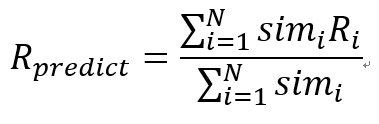

In [144]:
neighbors_similarity

u
민수    0.939827
지민    0.542857
지연    0.840841
현우    0.989949
Name: 민지, dtype: float64

In [145]:
neighbors_ratings

사람
민수    3.0
지민    4.0
지연    5.0
현우    3.0
Name: 노인과바다, dtype: float64

In [146]:
#분자
nominator = (neighbors_similarity * neighbors_ratings).sum()
nominator

12.16496376725352

In [147]:
#분모
denominator = neighbors_similarity.sum()
denominator

3.3134748798018654

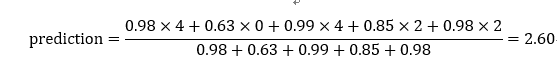

In [150]:
def predict_rating_test(user_name, book_name):
    neighbors_ratings = ratings[book_name].drop(index = user_name).sort_index()  # 자신의 것은 제외시킴
    neighbors_similarity = similarity_table[user_name].drop(index = user_name).sort_index()

    nominator = (neighbors_similarity * neighbors_ratings).sum()
    denominator = np.sqrt(((neighbors_similarity ** 2).sum()) * ((neighbors_ratings ** 2).sum()))

    score = nominator / denominator
    
    return score

In [175]:
def predict_rating(user_name, book_name):
    neighbors_ratings = ratings[book_name].drop(index = user_name).sort_index()  # 자신의 것은 제외시킴
    # print(neighbors_ratings)
    neighbors_similarity = similarity_table[user_name].drop(index = user_name).sort_index()
    # print(neighbors_similarity)

    nominator = (neighbors_similarity * neighbors_ratings).sum()
    # print(nominator)
    denominator = neighbors_similarity.sum()
    # print(denominator)
    
    score = nominator / denominator
    
    return score

In [174]:
predict_rating("민지", "노인과바다")

사람
민수    3.0
지민    4.0
지연    5.0
현우    3.0
Name: 노인과바다, dtype: float64
u
민수    0.939827
지민    0.542857
지연    0.840841
현우    0.989949
Name: 민지, dtype: float64
12.16496376725352
3.3134748798018654


3.671361398092429

In [153]:
predict_rating("현우", "백설공주")

2.4607597343308854

In [151]:
predict_rating_test("민지", "노인과바다")

0.9356723825644702

### 평점 테이블

In [154]:
ratings.index

Index(['민수', '현우', '지민', '지연', '민지'], dtype='object', name='사람')

In [155]:
ratings.columns

Index(['노인과바다', '백설공주', '신데렐라', '어린왕자', '콩쥐팥쥐', '흥부전'], dtype='object', name='책')

In [156]:
print(len(list(product(ratings.index, ratings.columns))))

30


In [157]:
list(product(ratings.index, ratings.columns))

[('민수', '노인과바다'),
 ('민수', '백설공주'),
 ('민수', '신데렐라'),
 ('민수', '어린왕자'),
 ('민수', '콩쥐팥쥐'),
 ('민수', '흥부전'),
 ('현우', '노인과바다'),
 ('현우', '백설공주'),
 ('현우', '신데렐라'),
 ('현우', '어린왕자'),
 ('현우', '콩쥐팥쥐'),
 ('현우', '흥부전'),
 ('지민', '노인과바다'),
 ('지민', '백설공주'),
 ('지민', '신데렐라'),
 ('지민', '어린왕자'),
 ('지민', '콩쥐팥쥐'),
 ('지민', '흥부전'),
 ('지연', '노인과바다'),
 ('지연', '백설공주'),
 ('지연', '신데렐라'),
 ('지연', '어린왕자'),
 ('지연', '콩쥐팥쥐'),
 ('지연', '흥부전'),
 ('민지', '노인과바다'),
 ('민지', '백설공주'),
 ('민지', '신데렐라'),
 ('민지', '어린왕자'),
 ('민지', '콩쥐팥쥐'),
 ('민지', '흥부전')]

In [183]:
def predict_rating_table(ratings):
    user_book_combinations = list(product(ratings.index, ratings.columns))
    
    rating_list = []
    
    for user_name, book_name in user_book_combinations:
        score = predict_rating(user_name, book_name)
        
        rating_predict = {
            'user': user_name,
            'book': book_name,
            'score': score
        }
        
        rating_list.append(rating_predict)
        
    rating_list = pd.DataFrame(rating_list)
    
    rating_table = pd.pivot_table(rating_list, index='user', columns='book', values='score')
    rating_table = rating_table[ratings.isnull()]
    
    return rating_table

In [184]:
ratings.sort_index()

책,노인과바다,백설공주,신데렐라,어린왕자,콩쥐팥쥐,흥부전
사람,,,,,,
민수,3.0,4.0,4.0,3.0,4.0,NaN
민지,NaN,5.0,4.0,1.0,NaN,3.0
지민,4.0,1.0,NaN,5.0,2.0,3.0
지연,5.0,NaN,3.0,4.0,3.0,3.0
현우,3.0,NaN,2.0,NaN,1.0,2.0


In [185]:
rating_table = predict_rating_table(ratings)
rating_table

book,노인과바다,백설공주,신데렐라,어린왕자,콩쥐팥쥐,흥부전
user,,,,,,
민수,NaN,NaN,NaN,NaN,NaN,2.754375
민지,3.671361,NaN,NaN,NaN,2.522275,NaN
지민,NaN,NaN,3.109381,NaN,NaN,NaN
지연,NaN,2.392236,NaN,NaN,NaN,NaN
현우,NaN,2.460760,NaN,3.256756,NaN,NaN


### 추천

In [186]:
def predict_book(user_name, k):
    prediction_list = rating_table.loc[user_name].sort_values(ascending=False)
    prediction_list = prediction_list.head(k).index
    
    return prediction_list

In [187]:
predict_book("민지", k = 2)

Index(['노인과바다', '콩쥐팥쥐'], dtype='object', name='book')

In [188]:
def predict_user(book_name, k):
    prediction_list = rating_table[book_name].sort_values(ascending = False)
    prediction_list = prediction_list.head(k).index
    
    return prediction_list

In [165]:
predict_user("백설공주", k = 2)

Index(['현우', '지연'], dtype='object', name='user')

In [166]:
rating_table["백설공주"]

user
민수         NaN
민지         NaN
지민         NaN
지연    2.392236
현우    2.460760
Name: 백설공주, dtype: float64

In [167]:
rating_table.loc["민지"]

book
노인과바다    3.671361
백설공주          NaN
신데렐라          NaN
어린왕자          NaN
콩쥐팥쥐     2.522275
흥부전           NaN
Name: 민지, dtype: float64

## 전체 예제: 협업 필터링 (Collaborative Filtering) 구현하기

이번에는 추천 시스템(Recommender System)에서 널리 사용되는 협업 필터링(이하 Collaborative Filtering)의 원리를 알아보고 이를 학습해봅니다. 추천 시스템은 사용자(이하 사용자)가 특정 물건이나 서비스(이하 상품)에 대한 선호 여부나 선호도를 예측하는 시스템을 의미합니다. 추천 시스템은 아마존과 같은 이커머스부터 페이스북과 같은 SNS, 유튜브, 넷플릭스 등과 같은 동영상 플랫폼까지 다양한 분야에서 두루 활용되고 있습니다.

Collaborative Filtering에는 사용자에게 상품을 추천을 방법이 크게 두 가지가 있음:

- 1) 사용자가 선호하는 상품과 유사한 다른 상품 을 추천(상품 기반)하거나 
     - 상품 기반 방식은 이후 아마존(Amazon)이 제안한 기법. 상품 기반 기법이 더 많은 기업들에서 사용되고 있다고 알려져있음
- 2) 사용자와 유사한 다른 사용자가 선호하는 상품을 추천(사용자 기반)합니다. 
     - 사용자 기반 기법이 먼저 등장한 전통적인 알고리즘

사용자 기반 방식이 갖는 문제는 우선 **1. 계산 복잡성 문제**와 **2. 희소성 문제**가 대표적입니다. 아마존과 같이 거대 이커머스 회사들은 수백만 명의 사용자와 수백만 개의 상품을 관리해야하는데 사용자 기반 방식을 사용하는 경우 사용자가 추가될 때마다 나머지 모든 사용자와의 유사도를 연산해야한다는 문제점이 있습니다. 

상품 기반 방식을 사용하는 경우에 미리 구해 놓은 상품 간 유사도를 활용할 수 있기 때문에 이러한 문제점이 어느 정도 해결됩니다! 물론 사용자 기반 방식도 상품과 사용자가 계속 추가되므로 일정 기간마다 새롭게 유사도를 구해야하지만 사용자 기반 방식보다는 훨씬 계산 복잡성이 작습니다. 그리고 계산 복잡성 문제가 해결되는 대신 이 거대한 행렬을 저장할 공간이 따로 확보되어야한다는 점을 굳이 단점으로 뽑을 수 있습니다. 

데이터 희소성 문제는 협업 필터링 알고리즘의 본질적인 취약한 점이지만 사용자가 많은 상품을 평가한 경우는 보통 없어서 이런 경우 사용자간의 유사도를 연산하는 것 자체가 어렵기 때문에 보통 사용자 기반 방식이 더 취약합니다.


상품 / 사용자 기반 기법은 전반적으로 다음과 같은 흐름으로 동작합니다.

1. 우선 사용자 $u$가 내릴 상품 $i$에 대한 평점(rating)을 추정하고자 합니다. 상품 $i$ / 사용자 $u$와 나머지 모든 상품 / 사용자의 유사도를 연산합니다.
2. 유사도가 높은 k개 상품 / 사용자를 선택합니다. 이를 이웃이라고 부르겠습니다.
3. 상품 기반 혹은 사용자 기반 기법에 따라 아래 단계를 수행하며 평점을 예측합니다.
    - 상품 기반 : 이웃 상품에 내린 사용자 $u$의 평점(rating)을 상품 $i$와의 유사도에 따라 가중 평균을 구합니다. 
    - 사용자 기반 : 이웃 사용자가 상품 $i$에 내린 평점(rating)을 사용자 $u$와의 유사도에 따라 가중 평균을 구합니다.
4. 아직 평점(rating)이 없는 항목에 대해 모든 평점(rating)을 예측합니다. 평점(rating) 예측 값 상위 n개 상품을 추천합니다.

이러한 머신러닝 알고리즘을 잘 이해하는 방법은, 알고리즘을 파이썬과 같은 프로그래밍 언어로 직접 구현해보는 것입니다. 이번에는 주어진 데이터와 문제를 Collaborative Filtering을 활용하여 파이썬으로 직접 구현해 보도록 합니다.

**다만 상품 / 사용자 기반 기법은 상품과 사용자중 어떠한 것을 기준으로 삼을지만 다르고 구현하는 방식은 완전히 대칭적으로 동일**하기 때문에 사용자 기반 방식을 기준으로 구현하도록 하겠습니다. 기본적으로 사용자 기반 기법이 동작하는 흐름을 풀어쓰면 다음과 같습니다.

1. 우선 사용자 $u$가 내릴 상품 $i$에 대한 평점(rating)을 추정하고자 합니다. 사용자 $u$와 나머지 모든 사용자간의 유사도 구합니다.
2. 유사도를 기준으로 사용자 $u$와 가장 유사한(가까운) k명의 사용자(이웃)을 구합니다.
3. 이웃들이 상품 $i$에 내린 평점을 가까운 이웃일수록 더 큰 가중치를 주어서 평균을 구합니다. 즉, 가중평균을 구합니다.
4. 아직 평점(rating)이 없는 항목에 대해 위의 과정으로 모든 평점(rating)을 예측합니다.
5. 평점(rating) 예측 값 상위 n개 상품을 추천합니다.

## Configuration

In [189]:
# 판다스 패키지를 Import
import pandas as pd

# 선형대수 패키지 넘파이 Import (수학 연산을 편라하게 하기 위한 용도로 사용)
import numpy as np

## Generate Dataset

먼저 Collaborative Filtering 알고리즘 원리를 잘 이해할 수 있는 데이터셋을 생성해보겠습니다. 추천 시스템을 구현한다고 할 때 어떠한 정보를 활용해볼 수 있을까요?

예를 들어 이커머스 서비스 추천 시스템을 구현해본다고 가정했을 때, 크게 두 가지 정보를 활용해볼 수 있습니다. 

1. 우선 사용자가 상품을 구매한 이후 남긴 평점 정보를 활용할 수 있습니다.
2. 혹은 사용자가 상품 판매 페이지에 머무른 시간 혹은 해당 상품을 클릭했는지 등의 정보를 활용해볼 수도 있습니다. 

앞서 말한 경우와 같이 사용자가 상품에 내린 직접적인 평가 데이터를 명시적 정보 (이하 explicit ratings), 사용자 행동을 통해 추론한 상품에 대한 간접적인 평가 데이터를 암시적 정보 (이하 implicit ratings)라고 말합니다. 

explicit ratings는 사용자로부터 얻을 수 있는 가장 정확한 평점입니다. 하지만, 사용자가 평가를 내릴 때 충분한 시간을 할애하는 것은 아니기에 평점 간의 척도가 정확하지 않을 수 있고 평점 수가 충분하지 않다는 한계가 있습니다. 이에 비해 implicit ratings는 평점을 쉽게 많이 수집할 수 있다는 장점이 있지만, 해당 정보를 무조건 사용자가 상품에 내린 긍정적 평가라고 결론 내릴 수는 없다는 단점이 있습니다.

이번에 다룰 데이터셋은 1) 사용자(User)가 2) 책이라는 상품(Item)에 남긴 3) 1에서 5점 척도의 평점(rating) 데이터입니다. 사용자가 아직 보지 않은 책에 대한 3) 평점을 Collaborative Filtering으로 예측해보겠습니다. 먼저 이를 위한 예시 데이터셋을 생성한 뒤, 이 데이터를 바탕으로 모델을 구현해보겠습니다.

In [190]:
# 간단한 데이터셋을 온라인에서 불러올 수 있습니다. 데이터를 불러올 url을 지정합니다.
url = "data/ratings.csv"

# pd.read_csv()로 url에서 데이터를 읽어온 후 data에 저장합니다.
data = pd.read_csv(url)

# data의 shape를 출력합니다.
print(data.shape)
# 데이터를 확인합니다.
data

(23, 3)


,사람,책,평점
0,민지,백설공주,5.0
1,민지,신데렐라,4.0
2,민지,어린왕자,1.0
3,민지,흥부전,3.0
4,현우,노인과바다,3.0
5,현우,신데렐라,2.0
6,현우,콩쥐팥쥐,1.0
7,현우,흥부전,2.0
8,민수,노인과바다,3.0
9,민수,백설공주,4.0


협업필터링은 다음과 같은 형태의 데이터를 사용해야 합니다. 일반적으로 사용자는 `index`, 상품은 `column`으로 지정합니다. 값으로는 평점, 구매횟수 등이 올 수 있습니다.

<table>
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>노인과바다</th>
      <th>백설공주</th>
      <th>신데렐라</th>
      <th>어린왕자</th>
      <th>콩쥐팥쥐</th>
      <th>흥부전</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>민지</th>
      <td>NaN</td>
      <td>5</td>
      <td>4</td>
      <td>1</td>
      <td>5</td>
      <td>3</td>
    </tr>
    <tr>
      <th>현우</th>
      <td>3</td>
      <td>NaN</td>
      <td>2</td>
      <td>3</td>
      <td>1</td>
      <td>2</td>
    </tr>
    <tr>
      <th>민수</th>
      <td>3</td>
      <td>4</td>
      <td>4</td>
      <td>3</td>
      <td>4</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>지민</th>
      <td>4</td>
      <td>1</td>
      <td>1</td>
      <td>5</td>
      <td>2</td>
      <td>3</td>
    </tr>
    <tr>
      <th>지연</th>
      <td>5</td>
      <td>NaN</td>
      <td>3</td>
      <td>4</td>
      <td>3</td>
      <td>3</td>
    </tr>
  </tbody>
</table>

In [191]:
# 판다스의 pivot_table을 이용하여 협업필터링에 사용할 데이터를 만듭니다.
ratings = data.pivot_table(index='사람', columns='책', values='평점').sort_values(by=['어린왕자'], ascending=True)

# ratings를 확인합니다.
ratings

책,노인과바다,백설공주,신데렐라,어린왕자,콩쥐팥쥐,흥부전
사람,,,,,,
민지,NaN,5.0,4.0,1.0,NaN,3.0
민수,3.0,4.0,4.0,3.0,4.0,NaN
지연,5.0,NaN,3.0,4.0,3.0,3.0
지민,4.0,1.0,NaN,5.0,2.0,3.0
현우,3.0,NaN,2.0,NaN,1.0,2.0


## Notation

$r_{ui}$를 사용자 $u$가 상품 $i$에 내린 ratings, $I_{uv}$ 를 사용자 $u$와 사용자 $v$가 모두 평가한 상품 집합, $U_{ij}$를 상품 $i$와 상품 $j$를 모두 평가한 사용자 집합이라고 표기하겠습니다.

## Calculate Similarity 

#### 사용자 기반(User-based)  기법

1. 사용자 "민지"와 나머지 모든 사용자의 유사도를 연산합니다. "민지"-"현우", "민지"-"민수", "민지"-"지민", "민지"-"지연"의 유사도를 연산합니다.

<table>
  <thead>
    <tr style="text-align: right;">
      <th>사용자</th>
      <th>유사도</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>현우</td>
      <td>0.7261</td>
    </tr>
    <tr>
      <th>민수</th>
      <td>0.9547</td>
    </tr>
    <tr>
      <td>지민</td>
      <td>0.5985</td>
    </tr>
    <tr>
      <th>지연</th>
      <td>0.8541</td>
    </tr>
  </tbody>
</table>

#### 상품 기반 (Item-based) 기법

1. 상품 "노인과바다"와 나머지 모든 상품의 유사도를 연산합니다. "노인과바다"-"백설공주", "노인과바다"-"신데렐라", "노인과바다"-"어린왕자", "노인과바다"-"콩쥐팥쥐", "노인과바다"-"흥부전"의 유사도를 연산합니다.

<table>
  <thead>
    <tr style="text-align: right;">
      <th>상품</th>
      <th>유사도</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>백설공주</td>
      <td>0.7761</td>
    </tr>
    <tr>
      <td>신데렐라</td>
      <td>0.8794</td>
    </tr>
    <tr>
      <th>어린왕자</th>
      <td>0.9830</td>
    </tr>
    <tr>
      <td>콩쥐팥쥐</td>
      <td>0.9032</td>
    </tr>
    <tr>
      <th>흥부전</th>
      <td>0.9949</td>
    </tr>
  </tbody>
</table>


그렇다면 임의의 두 사용자 혹은 임의의 두 상품, 즉 두 값이 얼마나 유사한지를 어떻게 판단할 수 있을까요? 우리가 알고 있는 가장 대표적인 방법으로 두 데이터가 얼마나 가까운지를 유클리디안 거리(Euclidean Distance)를 활용하여 측정해볼 수도 있습니다. 

이 외에도 다양한 유사도 메트릭을 사용하여 유사한 정도를 파악하는 것이 가능합니다. 주로 유사도 측정을 위하여 피어슨 상관계수(Pearson Correlation Coefficient), 스피어만 순위 상관계수(Sprearman Rank Correlation Coefficient), 켄달의 타우(Kendall's Tau), 코사인 유사도(Cosine Similarity), 자카드 유사도(Jaccard Coefficient) 등을 활용합니다.

여기서는 자주 쓰이는 피어슨 상관계수(Pearson Correlation Coefficient)에 대하여 더 자세하게 알아보고 이를 직접 구현해보겠습니다. 

### Pearson Correlation Coefficient

피어슨 상관계수는 Collaborative Filtering에서 유사도 측정 메트릭으로 주로 사용되며, 두 벡터의 선형 상관관계를 확인하기 위해 사용됩니다. 식으로 표현하자면 아래와 같습니다.

$$
similarity(\textbf x,\textbf y)=r_{\textbf x\textbf y} = \frac{\sum (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum (x_i - \bar x)^2}\sqrt{\sum (y_i - \bar y)^2}}
$$

피어슨 상관계수는 +1과 -1 사이의 값을 갖습니다. +1에 가까울수록 강한 양의 선형 상관관계가 있다는 것을 의미하고 -1에 가까울수록 강한 음의 선형 상관관계가 있다는 것을 의미합니다. 또한 0은 아무런 선형 상관관계가 없음을 뜻합니다. 

상품 $i$와 상품 $j$의 피어슨 상관계수는 아래와 같이 정의할 수 있습니다.

$$
similarity(i,j)=\frac{\sum_{u \in U_{ij}} (r_{ui}-\bar{r_i}) \cdot (r_{uj}-\bar{r_j})}{\sqrt {\sum_{u \in U_{ij}} (r_{ui}-\bar{r_i})^2} \sqrt {\sum_{u \in U_{ij}} (r_{uj}-\bar{r_j})^2}}
$$

또한 사용자 $u$와 사용자 $v$의 피어슨 상관계수는 아래와 같이 정의할 수 있습니다.

$$
similarity(u,v)=\frac{\sum_{i \in I_{uv}} (r_{ui}- \bar {r_u}) \cdot (r_{vi}-\bar {r_v})}{\sqrt {\sum_{i \in I_{uv}} (r_{ui}- \bar {r_u})^2} \sqrt {\sum_{i \in I_{uv}} (r_{vi}-\bar {r_v})^2}}
$$

피어슨 상관계수를 구할 때 주의해야 할 점이 있습니다. 바로 두 벡터간의 피어슨 상관계수를 계산하는 과정에서 분모가 0이 될 수 있다는 점입니다. 분모가 0이되는 경우 분자도 0이 나오는데 이러한 경우 결과가 0이 되어야하지만 0으로 나눌 수 없다는 에러가 발생합니다. 따라서 분모가 0이되지 않도록 만들며 분모가 0이 아니더라도 결과에 영향을 주지 않는 적당히 작은 값을 더해주어야 합니다. 이 더하는 작은 값을 보통 **epsilon**이라고 합니다. 파이썬에서 **epsilon**은 보통 0.0001 을 사용합니다.

**get_pearson_correlation()**

In [193]:
# 두 벡터간 피어슨 상관계수를 구해주는 get_pearson_correlation 함수를 구현해주세요.
# 두 벡터 u, v 중에 한 개라도 값이 비어있다면 그에 대응하는 값들은 유사도를 구할 때 제외해주세요.
# 분모가 0이 되는 경우를 제외하기 위해 최종적으로 분모에 epsilon을 더해주세요.
def get_pearson_correlation(u, v, epsilon):
    # 벡터 u와 v중에 한 개라도 값이 비어있으면
    # 대응하는 위치에 False, 둘 다 값이 채워져있면 True가 들어가도록 mask를 만듭니다.
    # np.isfinite()는 입력한 벡터의 위치마다 값이 비어있으면(NaN) False, 비어있지 않으면 True를 반환합니다.
    mask = (np.isfinite(u) & np.isfinite(v))
    
    # 위에서 만든 mask를 사용하여 u, v 모두 채워져있는 위치의 값들만 인덱싱합니다.
    u, v = u[mask], v[mask]
    
    # u, v 각 각 평균과의 차이(편차)를 구하여 변수에 저장합니다.
    u_dev, v_dev = u-u.mean(), v-v.mean()
    # u, v 각 각의 편차의 제곱의 합을 구하여 변수에 저장합니다.
    u_var, v_var = (u_dev**2).sum(), (v_dev**2).sum()
    
    # u_dev, v_dev 의 내적(Dot Product)을 구하여 분자에 저장합니다. 각 원소끼리 곱한 값들의 합을 구합니다.
    # u_dev.dot(v_dev) 또는 np.dot(u_dev, v_dev) 로 할 수 있습니다.
    nominator = (u_dev * v_dev).sum()
    # u_var, v_var을 곱한다는 루트를 씌워 분모를 구합니다.
    denominator = np.sqrt(u_var * v_var)
    
    # 분자에 분모를 나누어 피어슨 상관계수를 구합니다. 단 분모가 0인 경우를 처리해주기 위해 분모에 epsilon을 더합니다.
    pearson_correlation = nominator / (denominator + epsilon)
    
    return pearson_correlation    

In [196]:
# 테스트 
u = np.array([np.nan, 4, 3])
v = np.array([3, 2, 4])

get_pearson_correlation(u, v, epsilon = 0.0001)

-0.9999000099990001

In [197]:
get_cosine_similarity(u, v)

0.8944271909999159

In [198]:
# 모든 조합의 수를 구해주는 itertools의 product를 불러옵니다. 
from itertools import product

# 모든 사용자간의 피어슨 상관계수를 구해주는 get_pearson_correlation_table를 구현해주세요.
# 분모가 0이 되는 경우를 제외하기 위해 최종적으로 분모에 epsilon을 더해주세요. epsilon의 기본값은 0.0001으로 지정합니다.
def get_pearson_correlation_table(ratings, epsilon = 0.0001):
    # itertools의 product를 사용하여 인덱스와 인덱스 쌍의 모든 조합을 구합니다. 지금은 사용자의 이름이 index가 됩니다.
    # product는 입력하는 repeat 의 수에 해당하는 쌍을 만듭니다. 3을 입력하면 3개의 인덱스 조합을 생성합니다.
    # 결과를 list로 만들어 저장합니다.
    index_combinations = list(product(ratings.index, repeat=2))

    # 사용자간의 피어슨 상관계수를 담을 리스트를 생성합니다.
    similarity_list = []

    for u_name, v_name in index_combinations:
        # 모든 사용자에 대하여 각 사용자의 평점에 해당하는 벡터를 u, v 에 저장합니다.
        u = ratings.loc[u_name]
        v = ratings.loc[v_name]
    
        # 위에서 구현한 get_pearson_correlation()을 사용하여 u, v 의 피어슨 상관계수를 구합니다.
        score = get_pearson_correlation(u, v, epsilon)

        # 사용자의 이름과 피어슨 상관계수를 담는 딕셔너리 변수를 만듭니다.
        similarity = {
            'u': u_name,
            'v': v_name,
            'score': score
        }
        
        # 위에서 만든 사용자와 사용자간의 피어슨 상관계수가 담긴 딕녀너리 변수를 similarity_list에 추가합니다.
        similarity_list.append(similarity)  
    
    # 위의 for문이 끝나면 similarity_list에는 모든 사용자간의 피어슨 상관계수가 남겨져 있습니다.
    # 이를 깔끔하게 정리하기 위하여 판다스(Pandas)의 데이터프레임으로 변환합니다.
    similarity_list = pd.DataFrame(similarity_list)
    
    # 판다스의 피벗 테이블을 활용하여 결과를 깔끔하게 정리합니다.
    similarity_table= pd.pivot_table(similarity_list, index="u", columns="v", values="score")

    # similarity_table를 반환합니다.
    return similarity_table

In [199]:
# 테스트
# epsilon을 지정하지 않으면 기본값인 0.0001이 됩니다.
get_pearson_correlation_table(ratings)

v,민수,민지,지민,지연,현우
u,,,,,
민수,0.999917,0.970685,-0.948653,-0.904479,-0.865950
민지,0.970685,0.999989,-0.999988,-0.944858,0.000000
지민,-0.948653,-0.999988,0.999990,0.674182,0.999950
지연,-0.904479,-0.944858,0.674182,0.999969,0.816463
현우,-0.865950,0.000000,0.999950,0.816463,0.999950


In [200]:
ratings.T

사람,민지,민수,지연,지민,현우
책,,,,,
노인과바다,NaN,3.0,5.0,4.0,3.0
백설공주,5.0,4.0,NaN,1.0,NaN
신데렐라,4.0,4.0,3.0,NaN,2.0
어린왕자,1.0,3.0,4.0,5.0,NaN
콩쥐팥쥐,NaN,4.0,3.0,2.0,1.0
흥부전,3.0,NaN,3.0,3.0,2.0


In [201]:
# 테스트
# ratings 를 뒤집어(Transpose) 상품간의 피어슨 상관계수를 구할 수 있습니다.
# 판다스의 데이터프레임은 .T 로 Transpose 할 수 있습니다.
get_pearson_correlation_table(ratings.T)

v,노인과바다,백설공주,신데렐라,어린왕자,콩쥐팥쥐,흥부전
u,,,,,,
노인과바다,0.999964,-0.999933,0.000000,0.499975,0.134836,0.865950
백설공주,-0.999933,0.999988,0.000000,-0.960757,0.999967,0.000000
신데렐라,0.000000,0.000000,0.999964,-0.755886,0.981948,0.865950
어린왕자,0.499975,-0.960757,-0.755886,0.999989,-0.999950,0.000000
콩쥐팥쥐,0.134836,0.999967,0.981948,-0.999950,0.999980,0.865950
흥부전,0.865950,0.000000,0.865950,0.000000,0.865950,0.999867


In [202]:
ratings

책,노인과바다,백설공주,신데렐라,어린왕자,콩쥐팥쥐,흥부전
사람,,,,,,
민지,NaN,5.0,4.0,1.0,NaN,3.0
민수,3.0,4.0,4.0,3.0,4.0,NaN
지연,5.0,NaN,3.0,4.0,3.0,3.0
지민,4.0,1.0,NaN,5.0,2.0,3.0
현우,3.0,NaN,2.0,NaN,1.0,2.0


## Predict Ratings


### Get Nearest Neighbors

우선 특정 사용자 𝑢의 상품 𝑖를 평가할 때 사용자 𝑢의 이웃을 구하겠습니다. 기본적으로 사용자 𝑢와 유사도가 가장 큰 k명이 이웃이 됩니다. 하지만 조건을 좀 더 추가해야합니다. 가령 아이템에 평가를 내리지 않거나 유사도가 절대적으로 작은 사용자는 이웃이 될 수 없습니다.

다음의 조건에 해당하는 이웃을 구해주세요.

- 이웃의 기준은 유사도가 된다.
- 자기 자신은 이웃에서 제외한다.
- 해당 아이템에 평가를 내린 사람들중에서 최근접 이웃을 고른다. 즉, 아이템에 평가를 내린적 없는 사람들은 고려하지 않는다.
- 유사도가 0 이상인 사람들중에서 최근접 이웃을 고른다. 
- 유사도가 0이상인 이웃이 없다면 그나마 가장 유사도가 가장 큰 한 명을 고른다.

결과적으로 아이템을 산 사람들중에서만 이웃이 지정되기 때문에 **예측하려는 아이템마다 구해지는 이웃이 달라질 수 있습니다.**

**get_nearest_neighbors()**

In [203]:
# 특정 사용자 user_name의 상품 item_name를 예측할 때 user_name의 k명의 이웃들을 구하는 get_nearest_neighbors을 구현합니다.
# 이웃을 구하려는 사용자의 이름(user_name), 해당 상품의 이름(item_name), 평점 데이터(ratings), 사용자 또는 상품의 유사도 테이블(similarity), 구하려는 최대 이웃의 수(k)를 인자로 받습니다.
# 결과는 이웃들의 목록이 되어야합니다. 결과를 리스트(List)로 반환합니다.
# 평점이 존재하는 이웃이 없다면 빈 리스트를 반환합니다.
def get_nearest_neighbors(user_name, item_name, ratings, similarity, k):
    # k를 너무 크게 입력할시 최대값을 자신을 제외한 총 인원수로 지정합니다.
    # 우선 자신을 제외한 총 인원수를 구합니다.
    max_neighbors_num = similarity.shape[0] - 1
    # k가 총 인원수보다 크면 k를 총 인원수로 대체합니다.
    k = min(k, max_neighbors_num)
    
    # 자기 자신 제외한 사용자들의 유사도와 평점 데이터를 뽑아냅니다.
    neighbors_similarity = similarity[user_name].drop(index=user_name)
    neighbors_ratings = ratings[item_name].drop(index=user_name)
    
    # 해당 상품에 평점을 준 적이 있는 사용자들의 유사도와 평점 데이터만 남깁니다.
    neighbors_similarity = neighbors_similarity[neighbors_ratings.notnull()]
    neighbors_ratings = neighbors_ratings[neighbors_ratings.notnull()]

    # 해당 상품에 평점을 준 사용자가 없다면 빈 리스트를 반환합니다.
    if neighbors_ratings.shape[0] == 0:
        # 빈 인덱스를 반환할 수 있습니다.
        return neighbors_ratings.index
        
    # 내림차순으로 위에서 구해온 사용자의 유사도 neighbors_similarity를 정렬합니다.
    neighbors_similarity = neighbors_similarity.sort_values(ascending=False)
    
    # 유사도가 0 이상인 사용자만 뽑아 이웃 후보를 만듭니다.
    candidates = neighbors_similarity[neighbors_similarity > 0]

    if (candidates.shape[0]) == 0:
        # 유사도가 0이상인게 없다면, 즉 candidates 의 크기가 0이라면 
        # 그나마 유사도가 가장 큰 사용자를 이웃이 됩니다.
        nearest_neighbors = neighbors_similarity.head(1)
    else:
        # 최대 k 명의 이웃을 구합니다.
        nearest_neighbors = candidates.head(k)

    # 구한 이웃의 리스트를 반환합니다.
    return nearest_neighbors.index

$${F1 Score} = 2 \times \frac{{Precision}\times{Recall}}{{Precision} + {Recall}}$$

In [227]:
# 테스트 1
pearson_correlation = get_pearson_correlation_table(ratings)

In [228]:
pearson_correlation

v,민수,민지,지민,지연,현우
u,,,,,
민수,0.999917,0.970685,-0.948653,-0.904479,-0.865950
민지,0.970685,0.999989,-0.999988,-0.944858,0.000000
지민,-0.948653,-0.999988,0.999990,0.674182,0.999950
지연,-0.904479,-0.944858,0.674182,0.999969,0.816463
현우,-0.865950,0.000000,0.999950,0.816463,0.999950


In [206]:
ratings

책,노인과바다,백설공주,신데렐라,어린왕자,콩쥐팥쥐,흥부전
사람,,,,,,
민지,NaN,5.0,4.0,1.0,NaN,3.0
민수,3.0,4.0,4.0,3.0,4.0,NaN
지연,5.0,NaN,3.0,4.0,3.0,3.0
지민,4.0,1.0,NaN,5.0,2.0,3.0
현우,3.0,NaN,2.0,NaN,1.0,2.0


In [221]:
get_nearest_neighbors('민지', '어린왕자', ratings, pearson_correlation, k=2)

Index(['민수'], dtype='object', name='u')

In [220]:
get_nearest_neighbors('민수', '어린왕자', ratings, pearson_correlation, k=2)

Index(['민지'], dtype='object', name='u')

In [237]:
get_nearest_neighbors('지민', '신데렐라', ratings, pearson_correlation, k=2)

Index(['현우', '지연'], dtype='object', name='u')

In [214]:
get_nearest_neighbors('민수', '흥부전', ratings, pearson_correlation, k=2)

Index(['민지'], dtype='object', name='u')

In [212]:
# 테스트 1
get_nearest_neighbors('현우', '백설공주', ratings, pearson_correlation, k=2)

Index(['지민'], dtype='object', name='u')

In [216]:
get_nearest_neighbors('현우', '어린왕자', ratings, pearson_correlation, k=2)

Index(['지민', '지연'], dtype='object', name='u')

### Average Correction

유사한 상품/사용자에 더 큰 가중치를 주어 특정 상품에 대한 사용자의 ratings 값을 예측합니다. 유사도에 따라 ratings에 유사도가 높은 k개의 상품에 내려진 ratings의 평균/유사도가 높은 k명의 사용자가 내린 ratings의 평균을 뺀 값의 가중 평균을 구합니다. 이 값에 상품에 내린 ratings 값/사용자가 내린 ratings 값의 평균을 최종적으로 더하여 예측합니다. 상품/사용자가 받거나 하는 ratings 특성을 더 잘 반영합니다.


#### 사용자 기반(사용자-based) 기법
1. 특정 유사도 메트릭에 따라 사용자 $u$와 유사한 k명(혹은 이하)의 이웃을 결정합니다.
2. 유사한 k명의 사용자가 상품 $i$에 내린 ratings에 각각 k명의 사용자가 내린 ratings의 평균을 뺀 값에 대해 유사도에 따른 가중 평균을 구합니다.
3. 사용자 $u$이 내린 ratings 값의 평균을 더하여 값을 보정해줍니다.

$$
\hat r_{ui} = \bar r_u + \frac{\sum_{v \in {N_i}^k(u)}{similarity(u,v)} \cdot (r_{vi}-\bar r_v)}{\sum_{v \in {N_i}^k(u)}{similarity(u,v)}}
$$


#### 상품 기반(상품-based) 기법
1. 특정 유사도 메트릭에 따라 상품 $i$와 유사한 k개(혹은 이하)의 상품을 결정합니다.
2. 유사한 k개의 상품에 내린 사용자 $u$의 ratings에 각각 k개의 상품에 내려진 ratings의 평균을 뺀 값에 대해 유사도에 따른 가중 평균을 구합니다.
3. 상품 $i$에 내려진 ratings 값의 평균을 더하여 값을 보정해줍니다.

$$
\hat r_{ui} = \bar r_i + \frac{\sum_{j \in {N_u}^k(i)}{similarity(i,j)} \cdot (r_{uj}-\bar r_j)}{\sum_{j \in {N_u}^k(i)}{similarity(i,j)}}
$$

**average_correction_predict_rating()**

In [229]:
# 특정 사용자의 상품의 평점을 예측한 결과를 반환하는 average_correction_predict_rating를 구현합니다.
# 예측하려는 사용자의 이름(user_name)과 해당 상품의 이름(item_name), 평점 데이터(ratings), 사용자 또는 상품의 유사도 테이블(similarity), 구하려는 최대 이웃의 수(k), epsilon를 인자로 받습니다.
# epsilon의 기본값은 0.0001로 지정합니다.
def average_correction_predict_rating(user_name, item_name, ratings, similarity, k, epsilon=0.0001):
    # 인자로 받은 사용자의 예측하려는 상품에 대한 이웃을 구합니다.
    nearest_neighbors = get_nearest_neighbors(user_name, item_name, ratings, similarity, k)
    
    # 가까운 이웃이 없다면(특정 아이템에 평점이 한 개도 없다면) 빈 값(NaN)을 반환합니다.
    if len(nearest_neighbors) == 0:
        return np.nan
    
    # 사용자와 사용자의 이웃들의 유사도만 추출합니다.
    nn_similarity = similarity.loc[user_name, nearest_neighbors]
    # 사용자와 사용자의 이웃들의 평점 데이터만 추출합니다.
    nn_ratings = ratings.loc[nearest_neighbors, item_name]
    
    # 이웃들이 예측하려는 상품에 내린 평점의 평균을 구합니다.
    neighbors_rating_mean = nn_ratings.mean()
    # 예측하려는 사용자가 해당 상품에 내린 평점의 평균을 구합니다.  
    u_rating_mean = ratings.loc[user_name].mean()
    
    # 이웃들이 내린 평점에 이웃들의 평점의 평균을 뺀 값과 이웃들과의 유사도의 내적(Dot Product)을 구합니다.
    # 판다스 데이터프레임(DataFrame)의 .dot() 을 이용할 수 있습니다.
    nominator = nn_similarity.dot(nn_ratings-neighbors_rating_mean)
    #print(nn_similarity)
    #print(nn_ratings)
    #print(neighbors_rating_mean)
    # 유사도의 합을 구합니다.
    denominator = nn_similarity.sum()
    
    # nominator에 denominator 나누어 가중 평균을 구한 뒤 u_rating_mean을 더하여 보정합니다.
    # 단 epsilon을 더하여 분모가 0이되는 경우를 처리합니다.
    prediction = u_rating_mean + nominator / (denominator + epsilon)
    
    # 결과를 반환합니다.
    return prediction

In [239]:
pearson_correlation = get_pearson_correlation_table(ratings)
pearson_correlation

v,민수,민지,지민,지연,현우
u,,,,,
민수,0.999917,0.970685,-0.948653,-0.904479,-0.865950
민지,0.970685,0.999989,-0.999988,-0.944858,0.000000
지민,-0.948653,-0.999988,0.999990,0.674182,0.999950
지연,-0.904479,-0.944858,0.674182,0.999969,0.816463
현우,-0.865950,0.000000,0.999950,0.816463,0.999950


In [242]:
ratings

책,노인과바다,백설공주,신데렐라,어린왕자,콩쥐팥쥐,흥부전
사람,,,,,,
민지,NaN,5.0,4.0,1.0,NaN,3.0
민수,3.0,4.0,4.0,3.0,4.0,NaN
지연,5.0,NaN,3.0,4.0,3.0,3.0
지민,4.0,1.0,NaN,5.0,2.0,3.0
현우,3.0,NaN,2.0,NaN,1.0,2.0


In [247]:
# 테스트
pearson_correlation = get_pearson_correlation_table(ratings)

average_correction_predict_rating('현우', '어린왕자', ratings, pearson_correlation, k=2)

2.050505206443646

In [248]:
# 모든 비어있는 값을 예측하는 average_correction_predict 구현합니다.
# 단 비어있는 값만 예측 결과를 반환합니다.
# 사용자 기반, 상품 기반 기법 모두 가능하도록 구현합니다.
# kind에 사용자 기반인지 상품기반인지 여부를 지정합니다. 기본값은 사용자 기반으로 지정합니다.
# k는 2, epsilon은 0.0001을 기본값으로 설정합니다.
def average_correction_predict(ratings, kind='user', k=2, epsilon=0.0001):
    # 상품 기반 예측이면 행렬을 뒤집어주고(transpose) 마지막에 결과를 다시 뒤집어서 반환합니다.
    if kind == 'item':
        ratings = ratings.T
    
    # 유사도(피어슨 상관계수) 테이블을 구합니다.
    similarity = get_pearson_correlation_table(ratings, epsilon)
    
    # 예측한 결과를 담는 리스트를 만듭니다.
    prediction_list = []

    # 모든 사용자의 모든 상품에 대하여 예측을 진행합니다.
    # itertool의 product로 모든 사용자와 모든 상품의 조합을 만듭니다.
    for u_name, v_name in list(product(ratings.index, ratings.columns)):
        # 위에서 구현한 average_correction_predict_rating으로 사용자의 상품을 예측합니다.
        score = average_correction_predict_rating(u_name, v_name, ratings, similarity, k, epsilon)
        
        # 예측한 결과를 딕셔너리에 저장합니다.
        prediction = {
            'u' : u_name,
            'v' : v_name,
            "score" : score
        }
        # prediction_list 예측한 결과를 추가합니다.
        prediction_list.append(prediction)

    # 결과를 판다스의 피벗 테이블을 사용하여 데이터프레임으로 깔끔하게 정리합니다.
    result = pd.DataFrame(prediction_list).pivot_table(index='u', columns='v', values='score')
    # 단 비어있는 값만 예측 결과를 남깁니다.
    result = result[ratings.isnull()]
        
    # 아이템 기반이면 결과를 다시 뒤집어줍니다.
    if kind == 'item':
        return result.T

    # 결과를 반환합니다.
    return result

In [249]:
# 테스트
average_correction_predict(ratings, kind='user', k=2, epsilon=0.0001)

v,노인과바다,백설공주,신데렐라,어린왕자,콩쥐팥쥐,흥부전
u,,,,,,
민수,NaN,NaN,NaN,NaN,NaN,3.6
민지,3.25,NaN,NaN,NaN,3.25,NaN
지민,NaN,NaN,2.902711,NaN,NaN,NaN
지연,NaN,3.6,NaN,NaN,NaN,NaN
현우,NaN,2.0,NaN,2.050505,NaN,NaN


In [250]:
# 테스트
average_correction_predict(ratings.T, kind='item', k=2, epsilon=0.0001)

u,민수,민지,지민,지연,현우
v,,,,,
노인과바다,NaN,3.25,NaN,NaN,NaN
백설공주,NaN,NaN,NaN,3.6,2.000000
신데렐라,NaN,NaN,2.902711,NaN,NaN
어린왕자,NaN,NaN,NaN,NaN,2.050505
콩쥐팥쥐,NaN,3.25,NaN,NaN,NaN
흥부전,3.6,NaN,NaN,NaN,NaN


## Recommend

마지막으로 예측한 결과를 바탕으로 특정 사용자에게 상품을 추천하려고 합니다. 단순히 예측한 평점을 기반으로 추천하지 않고 조건을 추가해주도록 하겠습니다. 평점의 신뢰도를 위하여 추천할 상품이 받은 평점의 최소 개수를 지정해주세요. 즉, 최소 평점 개수 이상의 책만 추천되어야 합니다. 마지막으로 이미 본 것도 추천에서 제외해주어야 합니다. 조건을 정리하면 다음과 같습니다.

- 평점의 개수가 지정한 개수 이상인 상품만 추천한다.
- 이미 본 것은 추천하지 않는다.

**recommend()**

In [234]:
# recommend를 구현해주세요!
# numbers : 추천해줄 최대 책의 개수
# min_counts : 추천할 상품이 받은 평점의 최소 개수, 최소 이 개수 이상의 책만 추천합니다.
# numbers=3, min_count=3를 기본값으로 지정하겠습니다.
def recommend(name, ratings, prediction, numbers=3, min_count=3):
    # 입력한 사용자에 대한 예측값만 남깁니다. 시리즈(Series) 형태가 되므로 데이터프레임으로 변환합니다.
    result = prediction.loc[name].to_frame()
    # 상품이 받은 평점의 개수를 나타내는 count 컬럼을 만듭니다.
    result['count'] = (ratings.notnull()).sum()
    # 평점이 적힌 컬럼의 이름을 rating으로 지정합니다.
    result.columns = ['rating', 'count']
    # 평점을 기준으로 내림차순으로 정렬합니다.
    result = result.sort_values('rating', ascending=False)
    
    # 이미 본 것을 제외하고 최소 영화 평가 개수 이상인 결과만 남깁니다.
    over_min_count = result['count'] >= min_count
    not_wathced = result['rating'].notnull()
    #print(over_min_count)
    #print(not_wathced)
    result = result[over_min_count&not_wathced]

    # 추천해줄 최대 책의 개수만큼 추천합니다.
    recommendation = result.head(numbers)

    # 결과를 반환합니다.
    return recommendation

In [235]:
# 테스트
prediction = average_correction_predict(ratings)

recommend('민지', ratings, prediction, min_count=3)

,rating,count
v,,
노인과바다,3.25,4
콩쥐팥쥐,3.25,4


In [236]:
ratings

책,노인과바다,백설공주,신데렐라,어린왕자,콩쥐팥쥐,흥부전
사람,,,,,,
민지,NaN,5.0,4.0,1.0,NaN,3.0
민수,3.0,4.0,4.0,3.0,4.0,NaN
지연,5.0,NaN,3.0,4.0,3.0,3.0
지민,4.0,1.0,NaN,5.0,2.0,3.0
현우,3.0,NaN,2.0,NaN,1.0,2.0
